# AIT-580

# SRIRAJ-G01450571

In [41]:
import pandas as pd

file_path = '/Users/sriraj/Desktop/AIT-580/project assignment/Electric_Vehicle_Population_Size_History_By_County.csv'
data = pd.read_csv(file_path)

data.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,January 31 2017,Saratoga,NY,Passenger,1,1,2,79,81,2.47
1,December 31 2022,Middlesex,MA,Passenger,2,1,3,63,66,4.55
2,June 30 2017,Fulton,GA,Passenger,1,0,1,115,116,0.86
3,November 30 2021,Arlington,VA,Passenger,1,1,2,130,132,1.52
4,November 30 2019,Ferry,WA,Passenger,5,2,7,4415,4422,0.16


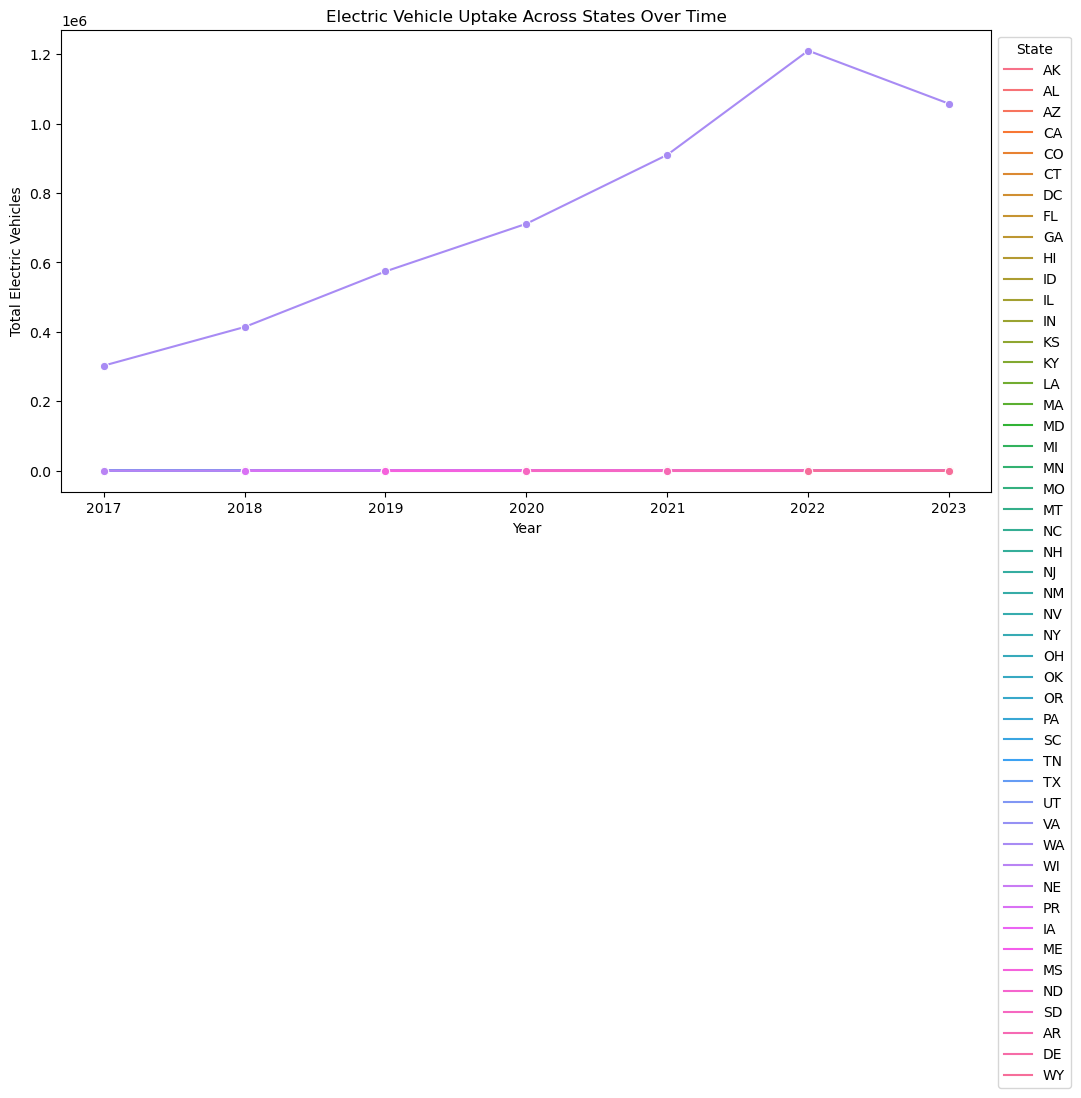

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data['Date'] = pd.to_datetime(data['Date'])

# Extract year from the date
data['Year'] = data['Date'].dt.year

# Group by Year, State and calculate the total electric vehicles
data_grouped = data.groupby(['Year', 'State'])['Electric Vehicle (EV) Total'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Electric Vehicle (EV) Total', hue='State', data=data_grouped, marker='o')
plt.title('Electric Vehicle Uptake Across States Over Time')
plt.xlabel('Year')
plt.ylabel('Total Electric Vehicles')
plt.legend(title='State', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

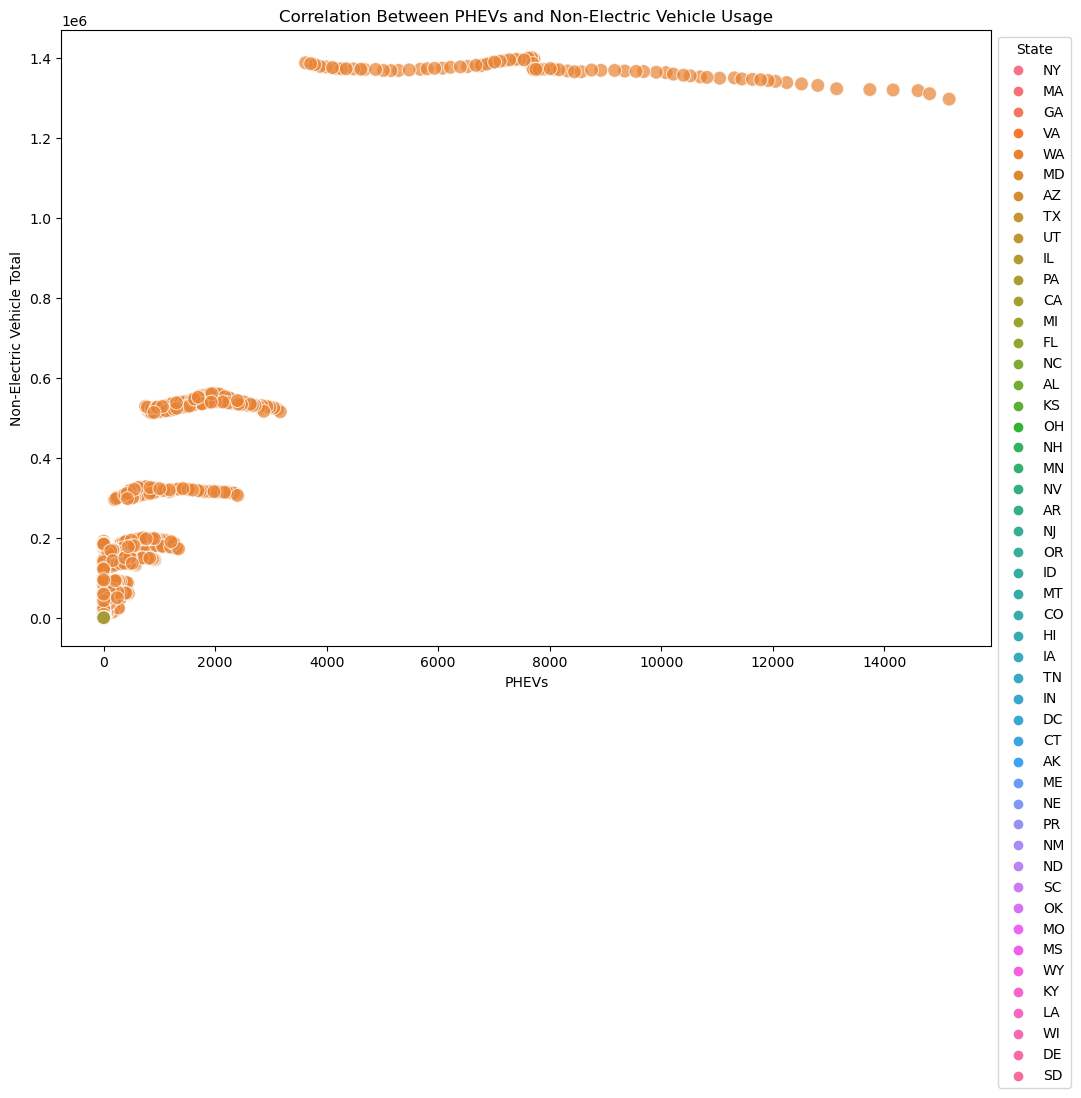

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Plug-In Hybrid Electric Vehicles (PHEVs)', y='Non-Electric Vehicle Total', hue='State', data=data, s=100, alpha=0.7)
plt.title('Correlation Between PHEVs and Non-Electric Vehicle Usage')
plt.xlabel('PHEVs')
plt.ylabel('Non-Electric Vehicle Total')
plt.legend(title='State', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


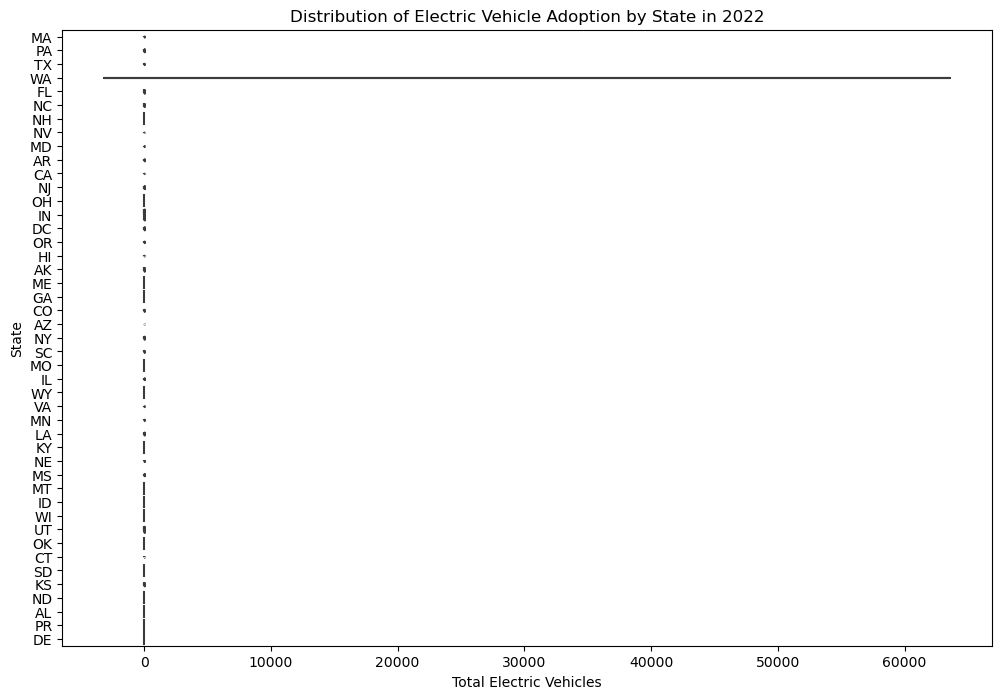

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
df_yearly = data[data['Year'] == 2022]

plt.figure(figsize=(12, 8))
sns.violinplot(x='Electric Vehicle (EV) Total', y='State', data=df_yearly, palette='muted', inner='quartile')
plt.title('Distribution of Electric Vehicle Adoption by State in 2022')
plt.xlabel('Total Electric Vehicles')
plt.ylabel('State')
plt.show()


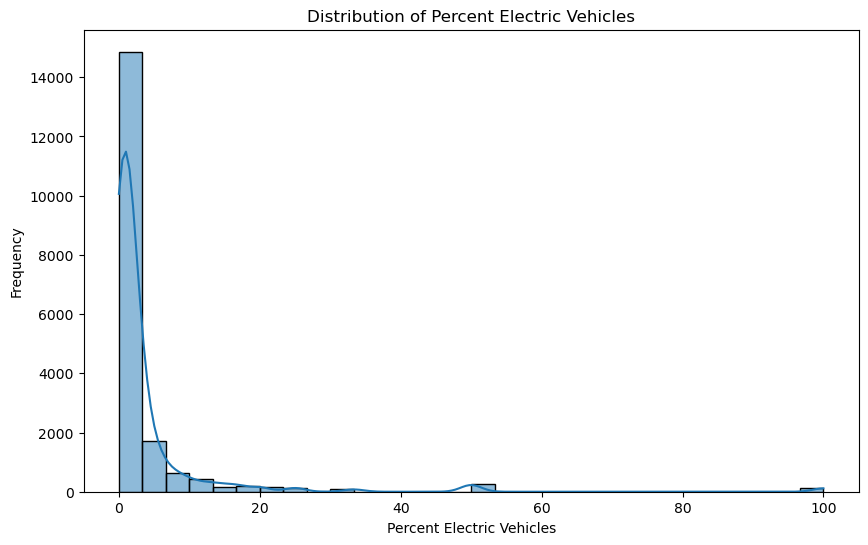

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Percent Electric Vehicles'], bins=30, kde=True)
plt.title('Distribution of Percent Electric Vehicles')
plt.xlabel('Percent Electric Vehicles')
plt.ylabel('Frequency')
plt.show()


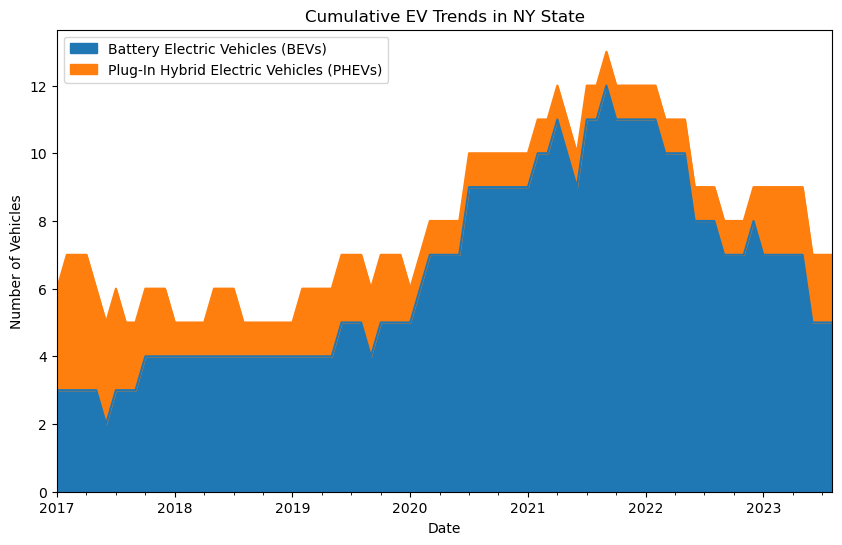

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'])
ny_data = data[data['State'] == 'NY']
ny_data = ny_data.groupby('Date').sum()

# Stacked area plot
ny_data[['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)']].plot(kind='area', stacked=True, figsize=(10, 6))
plt.title('Cumulative EV Trends in NY State')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.show()


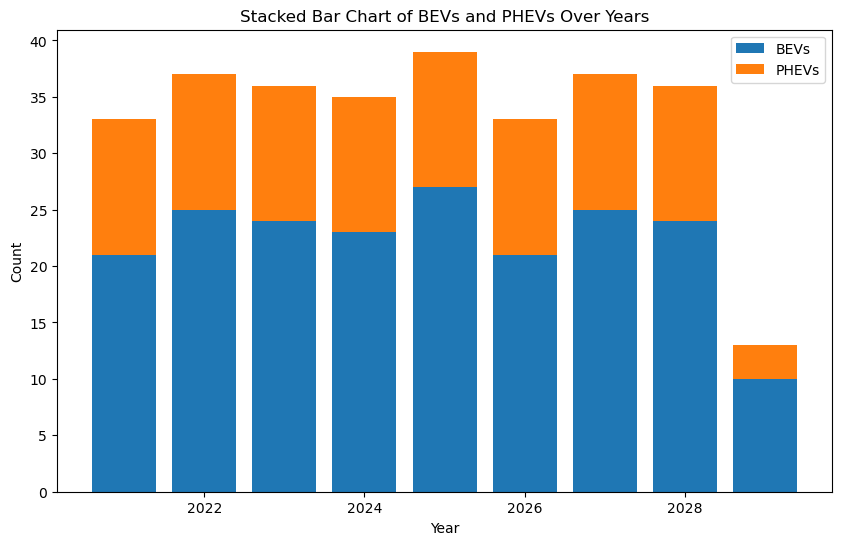

In [39]:
data = pd.DataFrame({
    'Date': pd.date_range(start='2021-01-01', periods=100, freq='M'),
    'BEVs': [i % 5 for i in range(100)],
    'PHEVs': [i % 3 for i in range(100)]
})

data['Year'] = data['Date'].dt.year

grouped_data = data.groupby('Year').agg({'BEVs': 'sum', 'PHEVs': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Year'], grouped_data['BEVs'], label='BEVs')
plt.bar(grouped_data['Year'], grouped_data['PHEVs'], bottom=grouped_data['BEVs'], label='PHEVs')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of BEVs and PHEVs Over Years')
plt.legend()
plt.show()


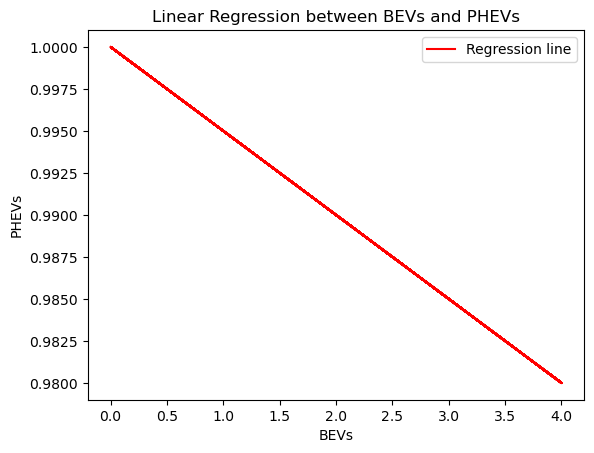

Slope: -0.005000000000000003
Intercept: 1.0
R-squared: 7.463800567248845e-05
P-value: 0.9320159808862483
Standard Error: 0.058460260355358735


In [33]:
import pandas as pd
from scipy import stats

x = data['BEVs']
y = data['PHEVs']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, slope*x + intercept, color='red', label='Regression line')

plt.xlabel('Column1')
plt.ylabel('Column2')
plt.title('Linear Regression between Column1 and Column2')
plt.legend()
plt.show()

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")